In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("mobilenetv2v1.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
12983,adagrad,34.350,52.050,39.4244,2,348.0024,16,0.26609,0.92188
12984,adam,47.175,26.450,42.5518,2,261.0018,16,0.05710,0.97917
12985,adamax,41.950,55.550,34.3129,2,304.5021,16,0.13655,0.94271
12986,ftrl,49.975,37.400,39.8327,2,435.0031,16,0.29843,0.88542


In [3]:
df.optimizer.value_counts()

adagrad     1624
adam        1624
adamax      1624
ftrl        1624
nadam       1624
sgd         1623
rmsprop     1623
adadelta    1622
Name: optimizer, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    12988 non-null  object 
 1   cpu          12988 non-null  float64
 2   memory       12988 non-null  float64
 3   time         12988 non-null  float64
 4   epochs       12988 non-null  int64  
 5   predictions  12988 non-null  float64
 6   dataset      12988 non-null  int64  
 7   loss         12988 non-null  float64
 8   accuracy     12988 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 913.3+ KB


In [5]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [6]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,12988.000000,12988.000000,12988.000000,12988.0,12988.000000,12988.000000,12988.000000,12988.000000
mean,54.141842,63.052446,32.533233,2.0,240.015293,14.461118,0.234340,0.885077
std,6.575235,17.160908,5.740987,0.0,124.391274,2.691719,0.235811,0.157746
min,26.125000,15.925000,22.577100,2.0,43.500300,1.000000,0.004010,0.187500
25%,50.450000,50.650000,27.835025,2.0,130.500900,15.000000,0.086760,0.890620
50%,55.325000,76.025000,30.809900,2.0,217.501500,15.000000,0.131420,0.953120
75%,58.600000,78.075000,36.954975,2.0,348.002400,16.000000,0.279487,0.968750
max,81.400000,82.925000,58.564600,2.0,435.003100,16.000000,1.291500,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [8]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


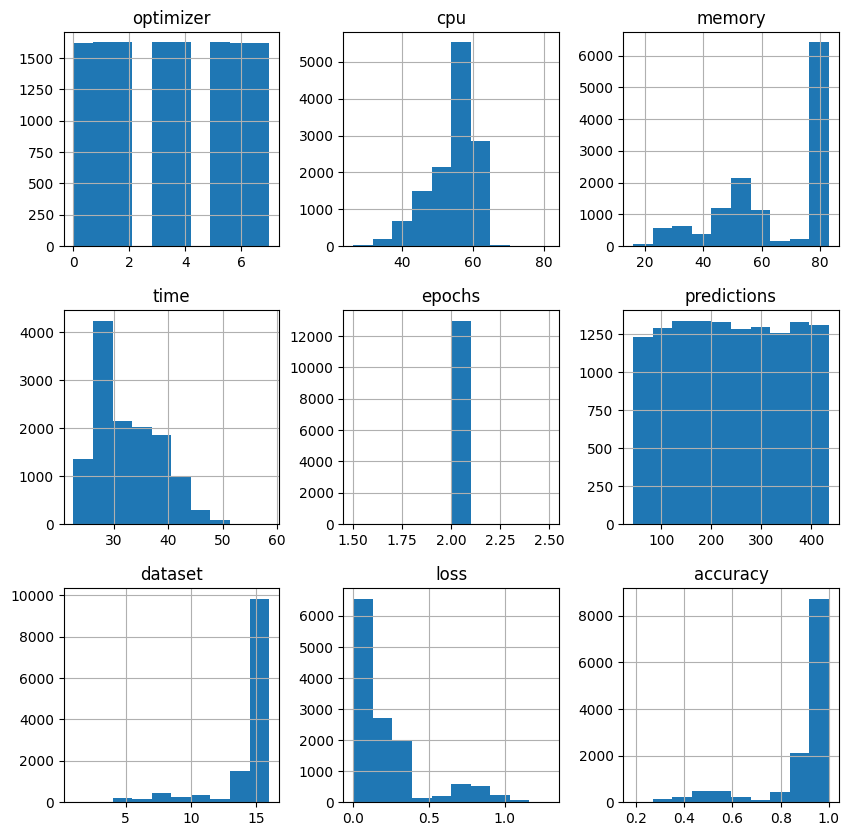

In [9]:
plot = df.hist(figsize=(10,10))

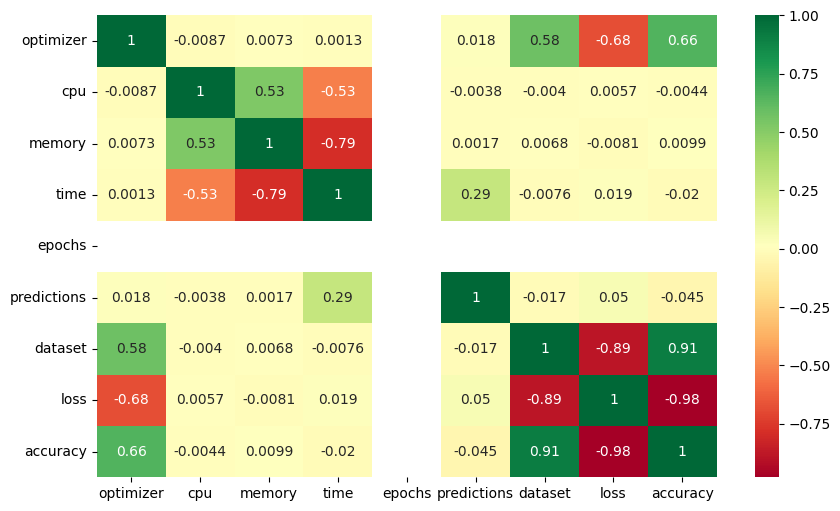

In [10]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [35]:
X = df[['dataset','loss','accuracy','time','cpu','memory']]
y = df['optimizer']

In [36]:
X.head()

,dataset,loss,accuracy,time,cpu,memory
0,15,0.29111,0.86458,26.9857,81.400,78.475
1,16,0.06496,0.98438,32.0057,77.775,61.225
2,15,0.07996,0.97396,46.2330,45.275,52.975
3,15,0.30984,0.86979,32.9408,62.925,51.200
4,15,0.11819,0.95312,30.7948,64.925,28.575


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [123]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [124]:
X_train

array([[ 0.57150193,  0.27274671,  0.15964353,  0.35466665, -1.12351109,
        -1.51841382],
       [-0.5567916 ,  1.76102439, -1.77514976,  1.68107424,  0.16339826,
        -1.00303983],
       [ 0.57150193, -0.30325577,  0.39316631,  0.77713165,  0.70183808,
        -0.37492777],
       ...,
       [ 0.19540408, -0.62569381,  0.49321091, -1.20328696,  0.0144681 ,
         0.98232135],
       [ 0.19540408, -0.66192954,  0.52658046,  0.35272118,  0.07938638,
        -1.72778451],
       [ 0.57150193, -0.39868509,  0.35979677, -0.99664647,  0.45743986,
         0.84762133]])

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [140]:
rf = RandomForestClassifier(max_depth=11)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.718
Test set score: 0.560
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       0.79      0.76      0.78       403
           2       0.26      0.21      0.23       401
           3       0.59      0.74      0.66       383
           4       0.76      0.80      0.78       414
           5       0.29      0.36      0.32       419
           6       0.51      0.27      0.35       406
           7       0.27      0.31      0.29       393

    accuracy                           0.56      3247
   macro avg       0.56      0.56      0.55      3247
weighted avg       0.56      0.56      0.55      3247



In [102]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.454
2,accuracy,0.259
0,dataset,0.099
3,time,0.074
5,memory,0.059
4,cpu,0.055


In [144]:
xg = XGBClassifier(n_estimators=8)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.639
Test set score: 0.572
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       428
           1       0.79      0.78      0.78       403
           2       0.26      0.20      0.22       401
           3       0.60      0.79      0.68       383
           4       0.78      0.81      0.80       414
           5       0.27      0.30      0.29       419
           6       0.63      0.29      0.40       406
           7       0.30      0.40      0.34       393

    accuracy                           0.57      3247
   macro avg       0.58      0.57      0.56      3247
weighted avg       0.58      0.57      0.57      3247



In [145]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.607
2,accuracy,0.227
0,dataset,0.072
3,time,0.044
5,memory,0.032
4,cpu,0.018


In [146]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.6, max_iter=500)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.527
Test set score: 0.516
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       428
           1       0.78      0.75      0.76       403
           2       0.20      0.15      0.17       401
           3       0.52      0.65      0.58       383
           4       0.75      0.81      0.78       414
           5       0.31      0.29      0.30       419
           6       0.18      0.22      0.20       406
           7       0.31      0.24      0.27       393

    accuracy                           0.52      3247
   macro avg       0.51      0.51      0.51      3247
weighted avg       0.51      0.52      0.51      3247



Neural Networks

In [151]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the optimizer labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
num_classes = y_encoded.shape[1]

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded)

In [152]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=X.shape[1],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [153]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

# Fit the model to the training data
history = model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=64, callbacks=[early_stopping], validation_data=(X_test_nn, y_test_nn))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/100
153/153 [==============================] - 5s 9ms/step - loss: 1.5667 - accuracy: 0.3775 - val_loss: 2.1664 - val_accuracy: 0.1321
Epoch 2/100
153/153 [==============================] - 1s 7ms/step - loss: 1.2215 - accuracy: 0.4671 - val_loss: 1.8611 - val_accuracy: 0.2177
Epoch 3/100
153/153 [==============================] - 1s 7ms/step - loss: 1.1432 - accuracy: 0.4942 - val_loss: 1.3168 - val_accuracy: 0.4416
Epoch 4/100
153/153 [==============================] - 1s 8ms/step - loss: 1.1115 - accuracy: 0.5067 - val_loss: 1.0935 - val_accuracy: 0.5112
Epoch 5/100
153/153 [==============================] - 1s 7ms/step - loss: 1.0756 - accuracy: 0.5231 - val_loss: 0.9941 - val_accuracy: 0.5427
Epoch 6/100
153/153 [==============================] - 1s 7ms/step - loss: 1.0598 - accuracy: 0.5306 - val_loss: 1.0645 - val_accuracy: 0.5171
Epoch 7/100
153/153 [==============================] - 1s 7ms/step - loss: 1.0564 - accuracy: 0.5267 - val_loss: 1.0704 - val_accuracy: 0.5297

Minimum validation loss: 0.9399048089981079


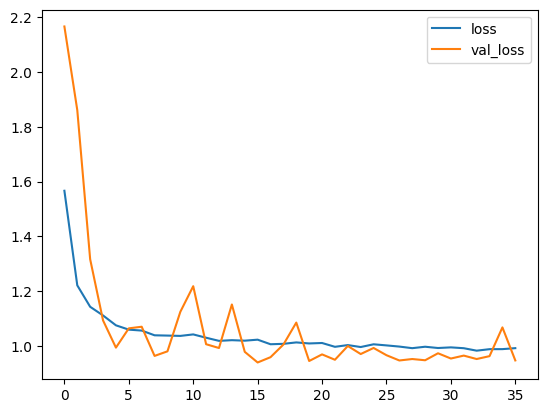

In [154]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Max val_accuracy: 0.5774561166763306


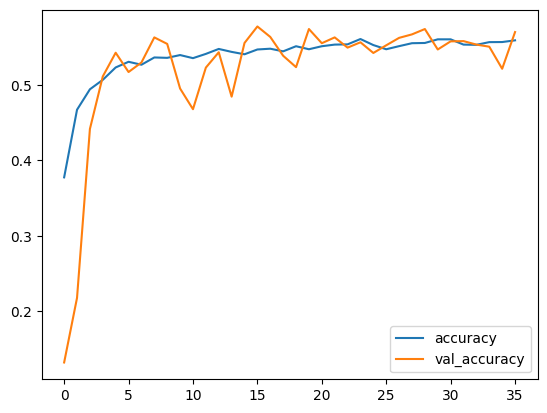

In [155]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Max val_accuracy: {}".format(history_df['val_accuracy'].max()))